In [68]:
# used for manipulating directory paths
import os
import pandas as pd
import numpy as np

# Plotting library
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [69]:
df = pd.read_csv('train.csv')
msk = np.random.rand(len(df)) <= 0.8

train = df[msk]
test = df[~msk]
train.head()
len(train)

337537

In [70]:
test.head()
len(test)

84033

In [71]:
train=train.replace('-','',regex=True).astype(int)
train = train.replace('FALSE', '0', regex=True).astype(int)

test=test.replace('-','',regex=True).astype(int)
test = test.replace('FALSE', '0', regex=True).astype(int)

In [72]:
x1 = train["Store"]
x2 = train["Dept"]
x3 = train["Date"]
x4 = train["IsHoliday"]
y = train["Weekly_Sales"]
m_train = y.size
print(x1.shape)
print(x2.shape)
print(x3.shape)
print(x4.shape)

(337537,)
(337537,)
(337537,)
(337537,)


Text(0, 0.5, 'Weekly_Sales')

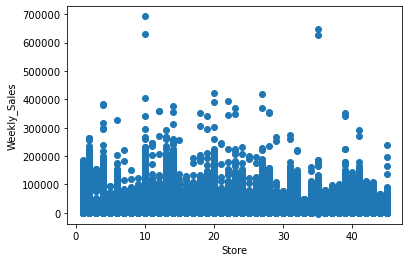

In [73]:
#Plot the data on scatter plot:
#plot Store vs Weekly_Sales:
plt.scatter(x1,y)
plt.xlabel("Store")
plt.ylabel("Weekly_Sales")

Text(0, 0.5, 'Weekly_Sales')

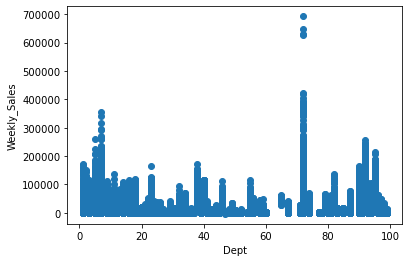

In [74]:
#plot Dept vs Weekly_Sales:
plt.scatter(x2,y)
plt.xlabel("Dept")
plt.ylabel("Weekly_Sales")

Text(0, 0.5, 'Weekly_Sales')

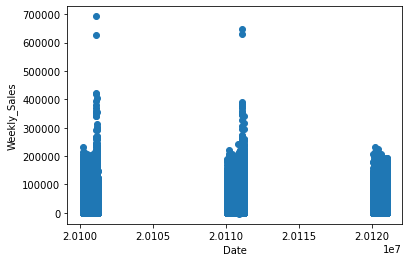

In [75]:
#plot Date vs Weekly_Sales:
plt.scatter(x3,y)
plt.xlabel("Date")
plt.ylabel("Weekly_Sales")

Text(0, 0.5, 'Weekly_Sales')

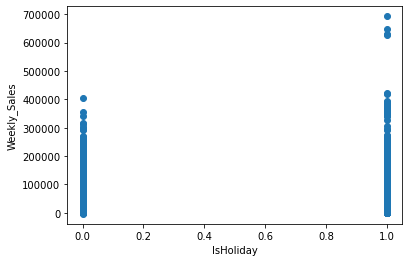

In [76]:
#plot IsHoliday vs Weekly_Sales:
plt.scatter(x4,y)
plt.xlabel("IsHoliday")
plt.ylabel("Weekly_Sales")

In [77]:
# Convert our variables datatype from series to array :

x1 = np.array(x1)
x2 = np.array(x2)
x3 = np.array(x3)
x4 = np.array(x4)
x1 = x1
x2 = np.power(x2,2)
x3 = np.power(x3,3)
x4 = np.power(x4,4)
y = np.array(y)

In [78]:
# Create a “ones” matrix :
x_bias = np.ones((m_train,1))

# Reshape our data so that we can perform operations like addition and multiplication with x_bias

x1_new = np.reshape(x1,(m_train,1))
x2_new = np.reshape(x2,(m_train,1))
x3_new = np.reshape(x3,(m_train,1))
x4_new = np.reshape(x4,(m_train,1))

#Create a major matrix with all the columns:

x_new = np.append(x_bias,x1_new,axis=1)
x_new = np.append(x_new,x2_new,axis=1)
x_new = np.append(x_new,x3_new,axis=1)
x_new = np.append(x_new,x4_new,axis=1)

x_new

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         4.29056064e+18,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         4.29904503e+18,  0.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         4.30752943e+18,  0.00000000e+00],
       ...,
       [ 1.00000000e+00,  4.50000000e+01,  9.60400000e+03,
        -7.37457620e+18,  0.00000000e+00],
       [ 1.00000000e+00,  4.50000000e+01,  9.60400000e+03,
        -7.36607424e+18,  0.00000000e+00],
       [ 1.00000000e+00,  4.50000000e+01,  9.60400000e+03,
        -7.34907032e+18,  0.00000000e+00]])

In [79]:
#Find transpose of a matrix :

x_new_transpose = np.transpose(x_new)

#Perform multiplication:

x_new_transpose_dot_x_new = x_new_transpose.dot(x_new)

#AFter regularization
lambd = -18
IdentityMatrix= np.zeros((5, 5))
#x_new_transpose_dot_x_new = x_new_transpose_dot_x_new + (lambd*IdentityMatrix)

# find the inverse

temp_1 = np.linalg.inv(x_new_transpose_dot_x_new + (lambd*IdentityMatrix))

#perform multiplication

temp_2 = x_new_transpose.dot(y)

#Finding coefficients :

theta = temp_1.dot(temp_2)

theta

array([ 1.50763201e+04, -1.65030700e+02,  1.57976983e+00,  5.28983400e-17,
        1.15282393e+03])

In [80]:
x1_test = test["Store"]
x2_test = test["Dept"]
x3_test = test["Date"]
x4_test = test["IsHoliday"]
y_test = test["Weekly_Sales"]
m_test=x1_test.size
print(x1_test.shape)
print(x2_test.shape)
print(x3_test.shape)
print(x4_test.shape)

(84033,)
(84033,)
(84033,)
(84033,)


In [82]:
# Convert our variables datatype from series to array :

x1_test = np.array(x1_test)
x2_test = np.array(x2_test)
x3_test = np.array(x3_test)
x4_test = np.array(x4_test)
x1_test = x1_test
x2_test = np.power(x2_test,2)
x3_test = np.power(x3_test,3)
x4_test = np.power(x4_test,4)
y_test = np.array(y_test)

In [83]:
# Create a “ones” matrix :
x_bias = np.ones((m_test,1))

# Reshape our data so that we can perform operations like addition and multiplication with x_bias

x1_new_test = np.reshape(x1_test,(m_test,1))
x2_new_test = np.reshape(x2_test,(m_test,1))
x3_new_test = np.reshape(x3_test,(m_test,1))
x4_new_test = np.reshape(x4_test,(m_test,1))

#Create a major matrix with all the columns:

x_new_test = np.append(x_bias,x1_new_test,axis=1)
x_new_test = np.append(x_new_test,x2_new_test,axis=1)
x_new_test = np.append(x_new_test,x3_new_test,axis=1)
x_new_test = np.append(x_new_test,x4_new_test,axis=1)


In [84]:
y_predict = np.zeros(m_test)
for i in range(m_test):
    sum = 0
    for n in range(4):
        sum += theta[n] * x_new_test[i][n]
    y_predict[i] = sum
print(y_predict)


print(y_test)

[15139.3839355  15146.69316481 15152.01484883 ... 22426.09864153
 22426.99811228 22432.84470268]
[24924 22136 57258 ...   605   508   760]


In [85]:
#evaluation
def WMAE(X_test, y_predict, y_test):
    sum = 0
    W = 0
    for i in range(m_test):
        if X_test[i][4] == 0:
            sum += abs(y_predict[i]-y_test[i])
            W += 1
        else:
            sum += 5 * abs(y_predict[i]-y_test[i])
            W += 5
    return sum / W

print(WMAE(x_new_test,y_predict,y_test))

14843.692943525035
